![alt text](drugbanner.jpg "shop")

### Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Import packages
import numpy as np
import pandas as pd
import datetime as dt

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

### Load the data

In [2]:
train = pd.read_csv('train.csv', parse_dates=True, low_memory=False, index_col='Date' )
test = pd.read_csv('test.csv',low_memory=False)

In [3]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [5]:
train.tail()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2013-01-01,1111,2,0,0,0,0,a,1
2013-01-01,1112,2,0,0,0,0,a,1
2013-01-01,1113,2,0,0,0,0,a,1
2013-01-01,1114,2,0,0,0,0,a,1
2013-01-01,1115,2,0,0,0,0,a,1


In [6]:
train.info()
print('-----------------------------------------------------')
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB
-----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null

In [7]:
train.StateHoliday.unique()

array(['0', 'a', 'b', 'c'], dtype=object)

StateHoliday value should be either 0 or 1. For simplicity, we will replace the non-zero values with 1.
Not all of them are national but regional holidays. You could also import Holidays package to check carefully. 

In [8]:
train['StateHoliday']= np.where(train.StateHoliday == '0',0,1)

train.StateHoliday.unique()

array([0, 1])

In [9]:
test[test['Open'].isnull()] #checking the null values. 

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


It seems that there are Null values in the Open column for certain dates, but we can leave it for now.

In [10]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,3.052470e-02,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,1.720261e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [11]:
# data extraction
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear

In [12]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31


In [13]:
# check if there were sales with zero
train[(train.Sales == 0)].shape

(172871, 12)

In [14]:
train[(train.Sales == 0) & (train.Open == 1)] # These stores might be due to refurbishment? \
                                              # or SchoolHoliday if they are located within schools?

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,,
2015-05-15,971,5,0,0,1,0,0,1,2015,5,15,20
2015-03-26,674,4,0,0,1,0,0,0,2015,3,26,13
2015-02-05,699,4,0,0,1,1,0,0,2015,2,5,6
2014-10-01,708,3,0,0,1,1,0,0,2014,10,1,40
2014-09-22,357,1,0,0,1,0,0,0,2014,9,22,39
2014-09-11,227,4,0,0,1,0,0,0,2014,9,11,37
2014-09-11,835,4,0,0,1,0,0,0,2014,9,11,37
2014-09-10,835,3,0,0,1,0,0,0,2014,9,10,37
2014-09-05,548,5,0,0,1,1,0,1,2014,9,5,36


In [15]:
# Drop the zero sales all together
train = train[(train.Sales != 0)]
train.shape

(844338, 12)

<Figure size 432x288 with 0 Axes>

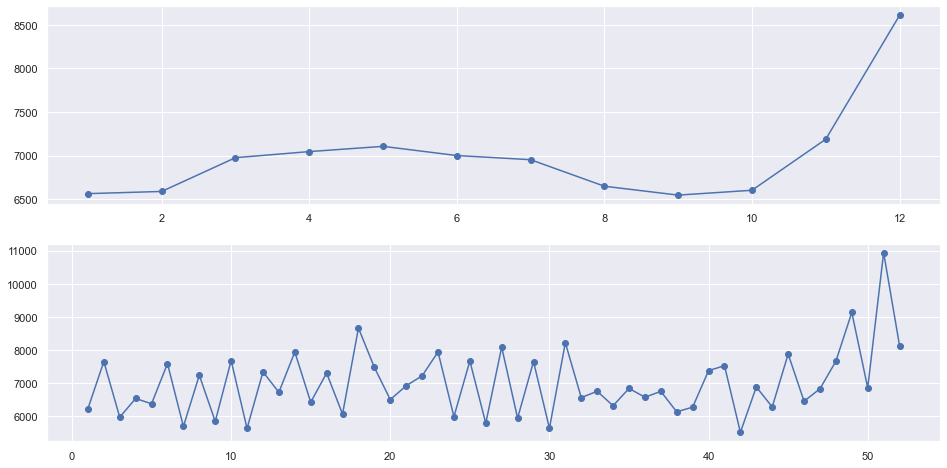

In [16]:
monthly_avg_sales = train.groupby('Month')['Sales'].mean()
weekly_avg_sales = train.groupby('WeekOfYear')['Sales'].mean()            

plt.figure()
f, axes = plt.subplots(2, 1, figsize=(16,8))             # you can also try seaborn's plots, which are shown later.

axes[0].plot(monthly_avg_sales, marker='o')
axes[1].plot(weekly_avg_sales, marker='o');

plt.show();

In [17]:
train.Store.nunique() # Number of unique stores in the data.

1115

In [18]:
# Now, let's have a look at the store dataset
store = pd.read_csv('store.csv', low_memory=False)
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


**Existing Features:**
- **Store**: each store has a unique ID.
- **StoreType**:  4 different store types: a, b, c, d.
- **Assortment**: a = basic, b = extra, c = extended.
- **CompetitionDistance**: the nearest competitor store in distance (meters).
- **CompetitionOpenSince[Month/Year]**: the month and year when the nearest competitor was opened
- **Promo2**: a promotion for some stores: (0 = not participating, 1 = participating)
- **Promo2Since[Week/Year]**: the calendar week and year when a store started participating in Promo2
- **PromoInterval**: the intervals of Promo2 throughtout a year.

In [19]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


The number of stores matches the train data. i.e. 1115                                                                             
We can also see that there are missing values in several features. Should we drop them all or replace with some values?

**Rule of thumb**: If the loss of a feature value is between 0% and 10%, we can make a few attempts to fill the missing points and use the feature.

In [20]:
# First, let's check the 3 missing values in CompetitionDistance
store[store.CompetitionDistance.isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


count     1112.000000
mean      5404.901079
std       7663.174720
min         20.000000
25%        717.500000
50%       2325.000000
75%       6882.500000
max      75860.000000
Name: CompetitionDistance, dtype: float64


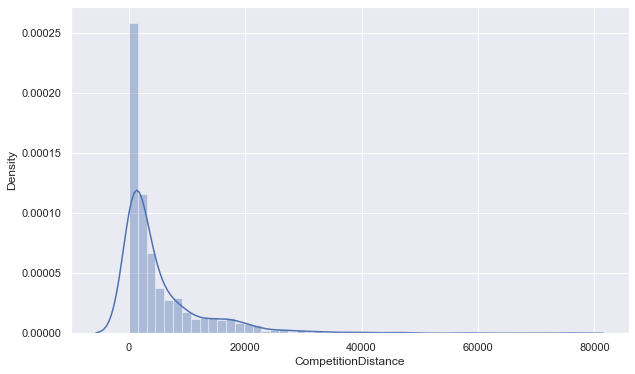

In [21]:
# Plot distribution
print(store.CompetitionDistance.describe())
plt.figure(figsize=(10, 6))
sns.distplot(store.CompetitionDistance.dropna()); 

The distribution of CompetitionDistance is right skewed, we choose to replace NaN with its media value instead of mean.

In [22]:
# Replacing with median value
store.CompetitionDistance.fillna(store['CompetitionDistance'].median(), inplace = True)

There are also missing values in **CompetitionOpenSinceMonth** and **CompetitionOpenSinceYear**. As we will calculate the duration of the competition later, for simplicity, we assign 0 to these fields. 

Similarly, there are missing values in **Promo2SinceWeek**, **Promo2SinceYear**, and **PromoInterval** if stores didn't participate in Promo2. We will assign 0 to them as well. 

In [23]:
# replace null values by 0
store.fillna(0, inplace = True)

In [24]:
train.reset_index(inplace=True) # reset index in order to preserve Date value in new dataframe after merge.
train = train.merge(store, on='Store', how='inner')
print(train.shape)
train.head()

(844338, 22)


,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2015-07-31,1,5,5263,555,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2015-07-30,1,4,5020,546,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,2015-07-29,1,3,4782,523,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,2015-07-28,1,2,5011,560,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,2015-07-27,1,1,6102,612,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 844337
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date                       844338 non-null  datetime64[ns]
 1   Store                      844338 non-null  int64         
 2   DayOfWeek                  844338 non-null  int64         
 3   Sales                      844338 non-null  int64         
 4   Customers                  844338 non-null  int64         
 5   Open                       844338 non-null  int64         
 6   Promo                      844338 non-null  int64         
 7   StateHoliday               844338 non-null  int32         
 8   SchoolHoliday              844338 non-null  int64         
 9   Year                       844338 non-null  int64         
 10  Month                      844338 non-null  int64         
 11  Day                        844338 non-null  int64   

In [26]:
train.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,6925.697986,3277.351589,46.0,4695.25,6285.0,8406.00,41551.0
b,15560.0,10233.380141,5155.729868,1252.0,6345.75,9130.0,13184.25,38722.0
c,112968.0,6933.126425,2896.958579,133.0,4916.00,6408.0,8349.25,31448.0
d,258768.0,6822.300064,2556.401455,538.0,5050.00,6395.0,8123.25,38037.0


In [27]:
avg_sales_per_storetype = train.groupby(['StoreType','Month'])['Sales'].mean()
avg_sales_per_storetype

StoreType  Month
a          1         6541.448981
           2         6580.303201
           3         6942.395216
           4         7032.460480
           5         7031.343005
           6         6964.882153
           7         6931.965451
           8         6632.842194
           9         6552.029228
           10        6596.723266
           11        7155.164338
           12        8502.125711
b          1         9351.202870
           2         9945.263919
           3        10276.171070
           4        10403.402694
           5        10669.069032
           6        10563.197333
           7        10201.915912
           8         9528.931574
           9         9723.497980
           10       10064.788856
           11       10616.990909
           12       11533.773216
c          1         6557.645771
           2         6577.725298
           3         6961.774362
           4         6991.764842
           5         7070.293973
           6         6841.

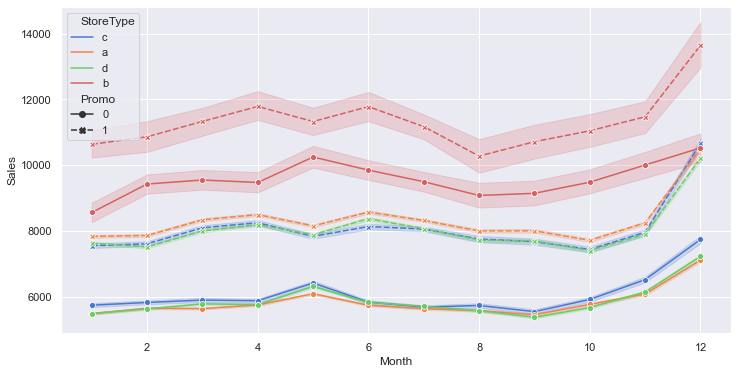

In [32]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales', hue='StoreType', 
             palette='muted',style='Promo', markers=True, 
             data=train); # default estimator ='mean'

By plotting the lineplot, we can have a clear view of the sales trend by month in different types of stores.                  Also, we can see that the sales are boosted when promos are kicked in.

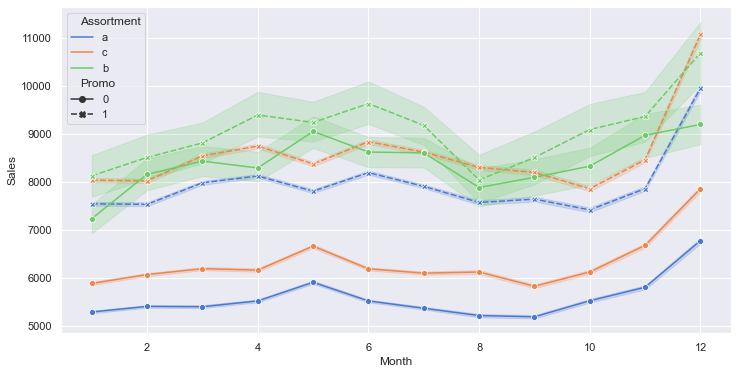

In [33]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales', hue='Assortment', 
             palette='muted', style='Promo', 
             markers=True, data=train);

Similary, as we can see that, 
- the sales trends are preserved in different Assortment types.
- promo boosts the sales in all Assortment types (perhaps works better in type a and c)
- Assortment b has more sales than the other two types (i.e. a and c), but remember we talk about average here.

**Excercise: What about the total sales? Try to plot this yourself!**

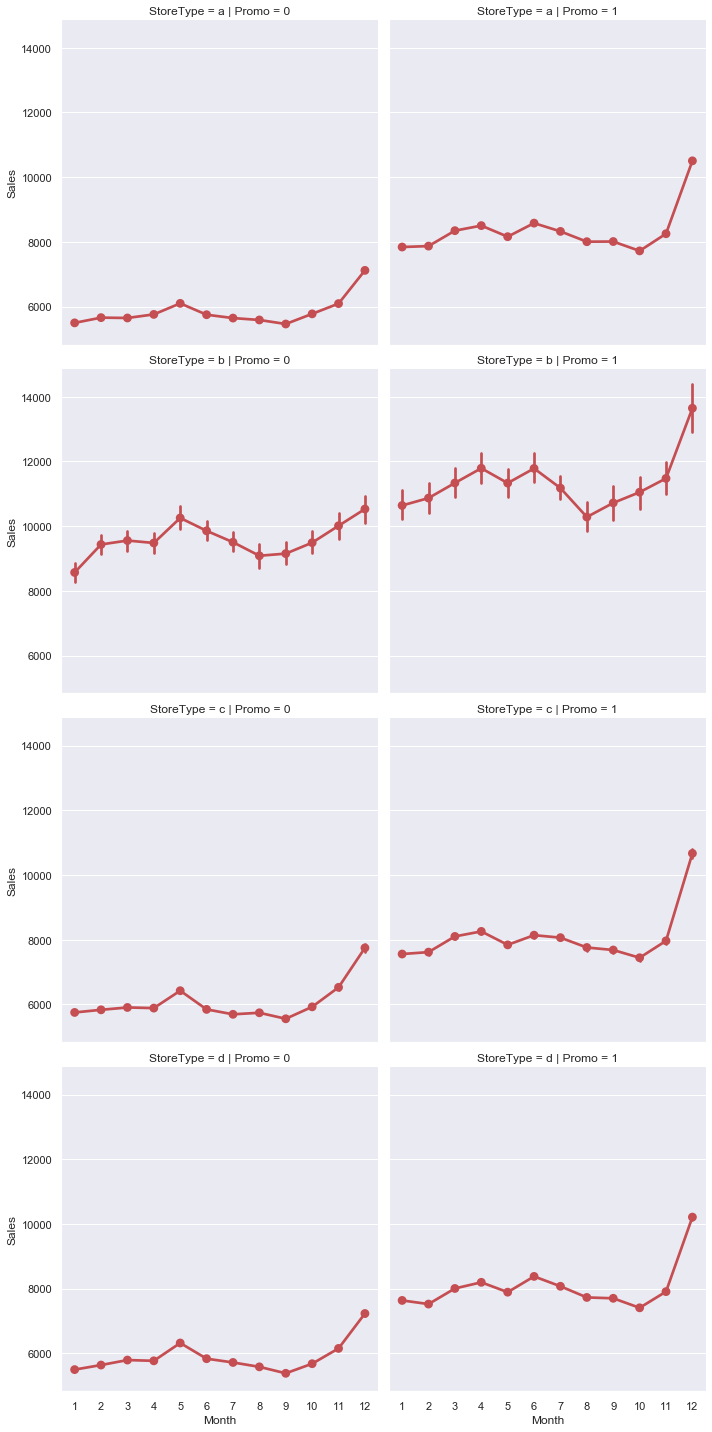

In [29]:
# another way to look at the trends by using catplot.
sns.catplot(x='Month', y='Sales', row='StoreType', 
            col='Promo', row_order= ['a', 'b','c','d'],
            kind='point', color='r', data=train);

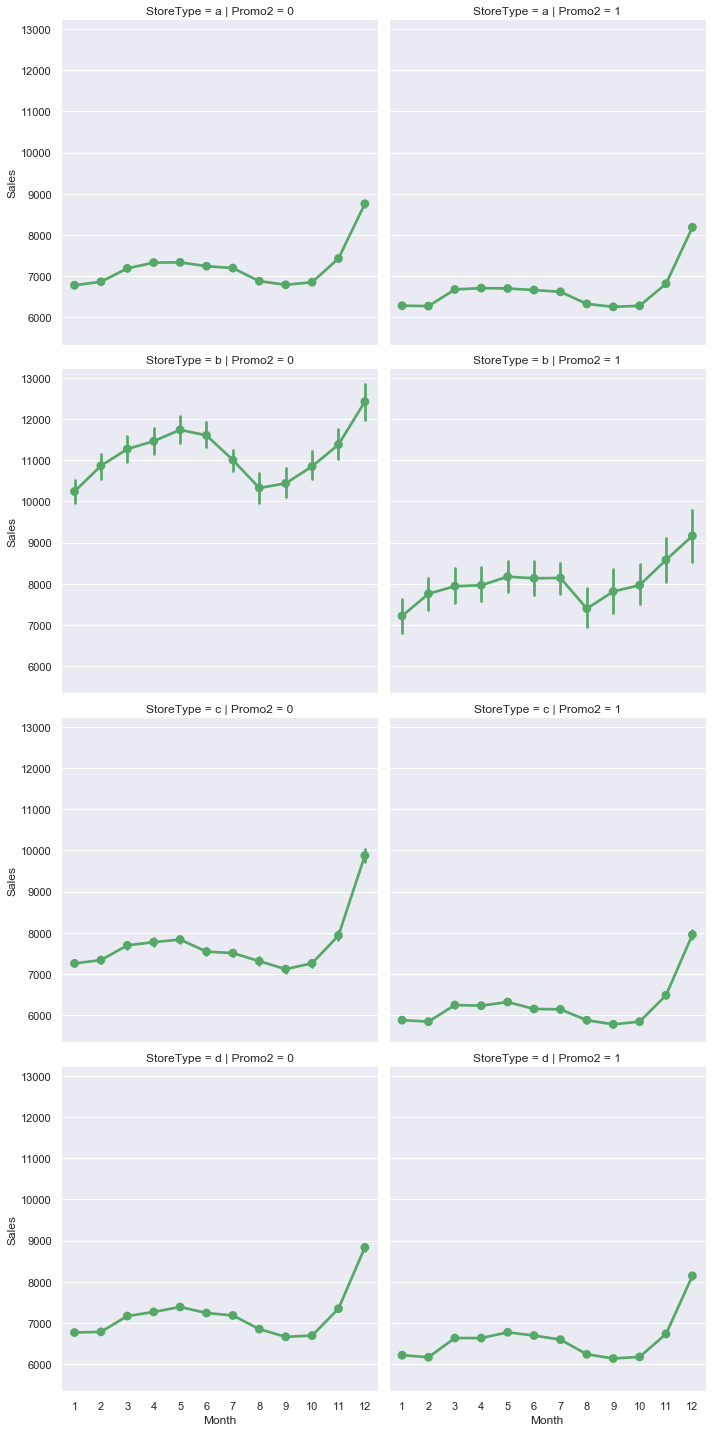

In [30]:
sns.catplot(x='Month', y='Sales', row='StoreType', 
            col='Promo2', row_order= ['a', 'b','c','d'],
            kind='point', color='g', data=train);

It seems that Promo2 doesn't really help with sales, but reducing average sales throughout the months.
Could it be a discounting/clearing out stocks?

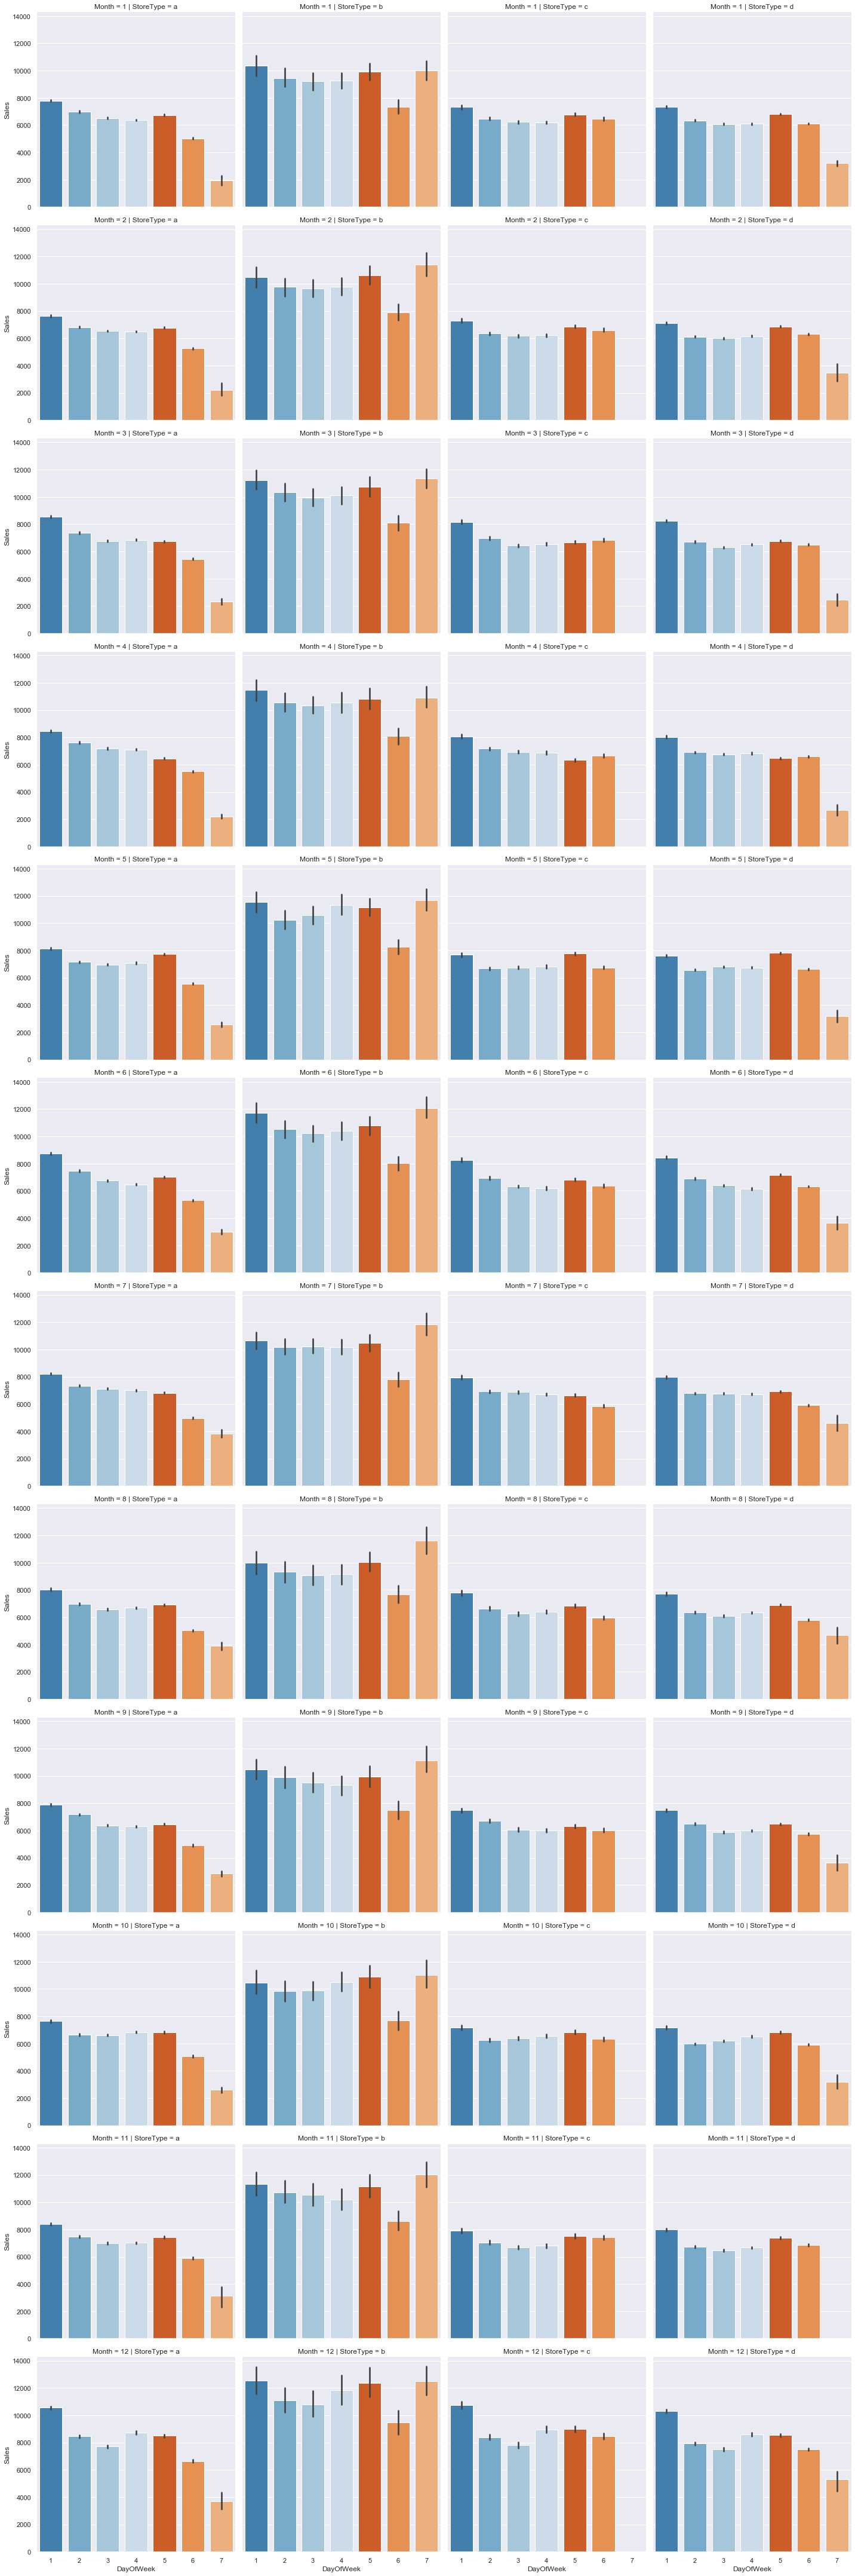

In [31]:
sns.catplot(x='DayOfWeek', y='Sales', col='StoreType', 
            col_order= ['a', 'b','c','d'], row = 'Month',
            palette = 'tab20c',
            kind='bar',  data=train); 

What we can see from above are that (Note: on average)
- StoreType **a** sells most on Monday, followed by Friday, and least on Sunday for all months, 
- StoreType **b** sells more on Monday, Friday and Sunday, while sells least on Saturday,
- StoreType **c** sells most on Monday, followed by Friday, sometimes on Saturday, but closes on Sunday,
- StoreType **d** sells most on Monday, Friday, and Saturday, but sells least on Sunday, and closes for all Sundays in November

How about in total? try to plot it yourself!
***

### Feature Engineering

Up until here, we have explored the data, including the data types, disbiturion/trend, different features and the possible relationships among them.
We have also learnt the missing values, categorial values, and datetimes in the dataset. 

Specifically, for categorial values, there are for example, numeric values and string text.

|Feature|Value |
|-------|------|
|  Open |(0, 1)|
|  Promo|(0, 1)|
|StateHoliday|(0,1)|
|StoreType|(a, b, c, d)|
|Assortment|(a,b,c)|

**Note**: Many ML models can only understand numeric values, but other categorical text values need to be transformed/represented with (0,1) dummy variables

In [32]:
# import LabelEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# instantiating
le = LabelEncoder()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')


In [33]:
# select which categorical columns to transform
cat_col = ['StoreType', 'Assortment']
# create a copy of the train dataframe
X = train.copy()

for each in cat_col:
    # reshape dummies to 2D for ohe tranformation
    dummies = le.fit_transform(X[each]).reshape(-1, 1)
    # create column names for ohe
    col_name = [each + "_" + str(i) for i in le.classes_]
    X_enc = pd.DataFrame(ohe.fit_transform(dummies),
                         columns=col_name)

    # join the newly created dummy features into X dataframe
    X = pd.concat([X, X_enc], axis=1)


# You can also try pd.get_dummies() with the following

# def one_hot(df, col_list):
#      for each in col_list:
#         dummies = pd.get_dummies(df[each], drop_first=True)
#         df = pd.concat([df, dummies], axis=1)
#     return df

In [34]:
# check the new columns
X.iloc[:,22:].sample(10)   

,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
718861,0.0,0.0,0.0,1.0,0.0,0.0,1.0
664026,0.0,0.0,0.0,1.0,1.0,0.0,0.0
606895,0.0,0.0,0.0,1.0,1.0,0.0,0.0
529331,0.0,0.0,0.0,1.0,1.0,0.0,0.0
831152,1.0,0.0,0.0,0.0,1.0,0.0,0.0
704544,1.0,0.0,0.0,0.0,0.0,0.0,1.0
686959,1.0,0.0,0.0,0.0,0.0,0.0,1.0
406994,1.0,0.0,0.0,0.0,1.0,0.0,0.0
144650,0.0,0.0,0.0,1.0,0.0,0.0,1.0
419136,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In addition, we need to transform/get the duration of the competition and promo2 since they started.

In [35]:
X.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,2015-07-31,1,5,5263,555,1,1,0,1,2015,...,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2015-07-30,1,4,5020,546,1,1,0,1,2015,...,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,2015-07-29,1,3,4782,523,1,1,0,1,2015,...,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,2015-07-28,1,2,5011,560,1,1,0,1,2015,...,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2015-07-27,1,1,6102,612,1,1,0,1,2015,...,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [36]:
# if ComtetitionOpenSinceMonth is 0, which means no values, return 0, otherwise calculate total months for duration.
X['CompetitionDuration'] = np.where(X.CompetitionOpenSinceMonth == 0, 0, (12 * (
    X.Year - X.CompetitionOpenSinceYear) + (X.Month - X.CompetitionOpenSinceMonth)))

# if Promo2SinceWeek is 0, which means no values, return 0, otherwise calculate total weeks for duration

X['Promo2Duration'] = np.where(X.Promo2SinceWeek == 0, 0, (12 * (
    X.Year - X.Promo2SinceYear) + (X.WeekOfYear - X.Promo2SinceWeek)/4))

In [37]:
X.tail()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,PromoInterval,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,CompetitionDuration,Promo2Duration
844333,2013-01-07,292,1,9291,1002,1,1,0,0,2013,...,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,43.0,0.0
844334,2013-01-05,292,6,2748,340,1,0,0,0,2013,...,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,43.0,0.0
844335,2013-01-04,292,5,4202,560,1,0,0,1,2013,...,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,43.0,0.0
844336,2013-01-03,292,4,4580,662,1,0,0,1,2013,...,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,43.0,0.0
844337,2013-01-02,292,3,5076,672,1,0,0,1,2013,...,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,43.0,0.0


Since we have noticed that Promo2 might impact sales, it is important to know whether a store is in promotion month for forecasting.

In [38]:
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
             7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}

X['Month_str'] = X.Month.map(month_map)   # convert to month strings to see whether they match PromoInterval.



In [39]:
X.PromoInterval.unique()

array([0, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [41]:
for l in X.PromoInterval.unique():
    if l != 0:
        for m in l.split(','):
            # only condition when 1 should be assigned
            X.loc[(X.Month_str == m) & (
                X.PromoInterval == l), 'IsPromo2month'] = 1
    else:
        X['IsPromo2month'] = 0

In [42]:
X[['Month', 'PromoInterval', 'IsPromo2month']].sample(20)

,Month,PromoInterval,IsPromo2month
275831,10,0,0
490047,5,0,0
539272,10,0,0
152018,3,0,0
218428,2,0,0
188701,6,0,0
271699,2,"Feb,May,Aug,Nov",1
582790,12,0,0
399592,10,0,0
42431,12,0,0


In [44]:
# drop unnecessary columns and complete data preparation.
columes = ['StoreType', 'Assortment', 'CompetitionOpenSinceMonth', 
           'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'Month_str','PromoInterval']

X = X.drop(columns=columes, axis=1) 
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 844337
Data columns (total 25 columns):
Date                   844338 non-null datetime64[ns]
Store                  844338 non-null int64
DayOfWeek              844338 non-null int64
Sales                  844338 non-null int64
Customers              844338 non-null int64
Open                   844338 non-null int64
Promo                  844338 non-null int64
StateHoliday           844338 non-null int32
SchoolHoliday          844338 non-null int64
Year                   844338 non-null int64
Month                  844338 non-null int64
Day                    844338 non-null int64
WeekOfYear             844338 non-null int64
CompetitionDistance    844338 non-null float64
Promo2                 844338 non-null int64
StoreType_a            844338 non-null float64
StoreType_b            844338 non-null float64
StoreType_c            844338 non-null float64
StoreType_d            844338 non-null float64
Assortment_a   

### Correlation Analysis

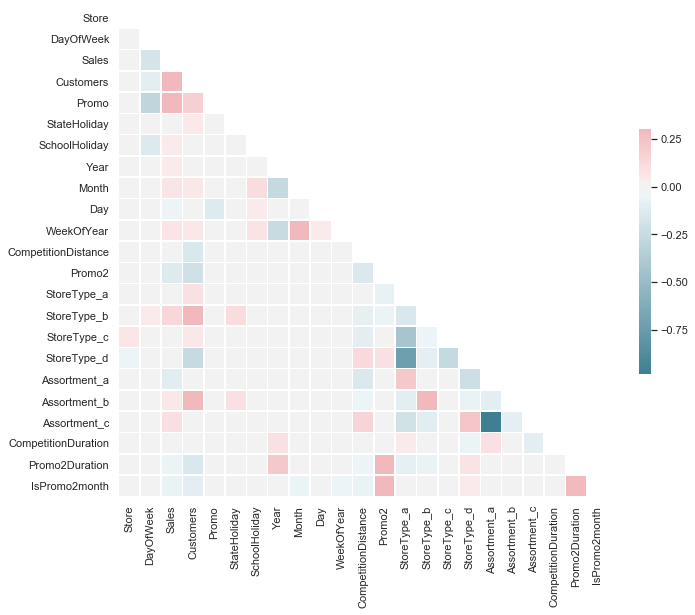

In [45]:
X = X.drop('Open', axis=1)  # drop column Open as it only has 1 value.
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### Conclusion

In [46]:
# Save data to csv file for later use.

X.to_csv("X.csv", index=False)